<a href="https://colab.research.google.com/github/viswa0531/StockMarketPredictionUsingML/blob/master/StockPredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Stock Price Prediction

#Team Members and Contribution

### Julian S Simon (013793273)
### Paramdeep Saini (013770341)
### Rajalakshmi Babu (011486345)
### Viswanath Singh Kambam (012497524)

#Configuration of the System


Colab has been used to develop the project. We iteratively enhanced the code based on the availability of the dataset. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from itertools import cycle 
from math import sqrt
from matplotlib import gridspec 
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs 
from scipy.spatial.distance import pdist

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import gridspec 
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics
from math import sqrt
from sklearn.datasets.samples_generator import make_blobs 
from scipy.spatial.distance import pdist

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

%matplotlib inline

#Data Collection

Totally ten different company stocks has been gathered and analysed here.
The stock data is collected from wiki.
The twitter data for each company is collected from twitter.
The data is cleansed and amolgamised to store in the google drive.

Following colab link provides details on how the data is collected 

https://drive.google.com/file/d/18ia7kK7pMMcZBelBs3hMVKn4xwJECmrc/view?usp=sharing

In [0]:
def getDataLinks():

  dataLinks = [
      "https://drive.google.com/open?id=114szhtJJZzpC0wBOlAOUe7gHJtRRO5S9",
      "https://drive.google.com/open?id=1U1_RzMYhX4RmYCyJeeB5IQXrXE0QpwfC",
      "https://drive.google.com/open?id=11ywMy12rMquunITls78uTf7JfFauMX4g",
      "https://drive.google.com/open?id=1lU0AHeYgPXTTH41zhBm9_c9JGQlLLLRs",
      "https://drive.google.com/open?id=1bJAoEwnA3cSennj58MJH_6_X1MA_vi3U",
      "https://drive.google.com/open?id=1rhaKg04VDHdBo29gQydaSAjp4ILNzfXZ",
      "https://drive.google.com/open?id=1Qb7cV0OXdh63WYJmaAE2IGUfZHmr5AgZ",
      "https://drive.google.com/open?id=1HXEGuKykZ0jv4CBs24YL25WDTB13Fniz",
      "https://drive.google.com/open?id=17QHsQXgjhnMo8hUnOCPf6gZzgklSmWYb",
      "https://drive.google.com/open?id=1pWjl8U4wX8V_QDfrEXzZscmGNGmykh4r"
  ]
  
  return dataLinks

In [0]:
def getWorldStockLink():
  worldStockDict = {
      "aord": "https://drive.google.com/open?id=1-VHIMqyGe-GO_BMldatxXOAhyCfbcHIT",
      "nikkei": "https://drive.google.com/open?id=1KgJox07UP9axIUMlAyCuNIGMnJt_znzt",
      "hsi": "https://drive.google.com/open?id=1legbaS4MBaFvy342C3xGF0-d-M7Kj9Rk",
      "daxi": "https://drive.google.com/open?id=1_VhsRj9mbTePrB8Fgqj9yZo2Reza8EvL",
      "cac40": "https://drive.google.com/open?id=1WQna1LVO5TRTUXnC9vnB5IHxIUbz0mCx",
      "sp500": "https://drive.google.com/open?id=1DzLEvUA-Kq_bqYqL3tCIzStm-yqvMF2V",
      "dji": "https://drive.google.com/open?id=1de7c-lGWzHmtfCn8xEu2w0mTcaQyieRW",
      "nasdaq": "https://drive.google.com/open?id=1QcOwmcCvBp3CHaOWsZ5srFrToOY6Kwk1",
      "spy": "https://drive.google.com/open?id=13Z4epwbIPQIOxlWJCmGQFX6Qmw_k9Rce"
  }
  return worldStockDict


In [0]:
def getWorldStocktTenyearLink():
  worldStockDict = {
      "aord10": "https://drive.google.com/open?id=19RwUgkWiihKfnKWyMZMVIo21Yinm2CVa",
      "nikkei10": "https://drive.google.com/open?id=19NNLzQop_zYPmGgEIr0p1-M2lX7JLjAv",
      "hsi10": "https://drive.google.com/open?id=1Szap5abiO5gtjihv4PoPoamGmB6aTiFa",
      "daxi10": "https://drive.google.com/open?id=14Chi09QZUqFy3it7FlbmLUKExE8uioQX",
      "cac4010": "https://drive.google.com/open?id=1q5fAYS0satoFN5OWE4TugyT1C10EbRye",
      "sp50010": "https://drive.google.com/open?id=1nshNr3cvhouFee51A3lZU8rl97wU4A_N",
      "dji10": "https://drive.google.com/open?id=1KEp-Cs8FaAzERTGgZIGhUi1W5ASPn4cz",
      "nasdaq10": "https://drive.google.com/open?id=1Xo9V_MdBKhTZ5Dh8RA4aAGPenCe5avpm",
      "spy10": "https://drive.google.com/open?id=1xigAGtGbWB_ljcZFsD851lMveRXeOyro",
      "amzn10": "https://drive.google.com/open?id=1RONPOZYRX_dE_Vh6-zRrnFSvByBY8VzJ"
  }
  return worldStockDict

In [0]:
def getWorldStockIndex(link_dict):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  global aord
  global nikkei
  global hsi
  global daxi
  global cac40
  global sp500
  global dji
  global nasdaq
  global spy

  for key, value in link_dict.items():
    fluff, id = value.split('=')
    downloaded = drive.CreateFile({'id':id}) 
    if key == "aord":
      fileName = "ALLOrdinary.csv"
      downloaded.GetContentFile(fileName)
      aord = pd.read_csv(fileName).dropna(axis=1, how='all')
      aord = aord.dropna(axis=0)
    if key == "nikkei":
      fileName = "Nikkei225.csv"
      downloaded.GetContentFile(fileName)      
      nikkei = pd.read_csv(fileName).dropna(axis=1, how='all')
      nikkei = nikkei.dropna(axis=0)
    if key == "hsi":
      fileName = "HSI.csv"
      downloaded.GetContentFile(fileName)   
      hsi = pd.read_csv(fileName).dropna(axis=1, how='all')
      hsi = hsi.dropna(axis=0)
    if key == "daxi":
      fileName = "DAXI.csv"
      downloaded.GetContentFile(fileName) 
      daxi = pd.read_csv(fileName).dropna(axis=1, how='all')
      daxi = daxi.dropna(axis=0)
    if key == "cac40":
      fileName = "cac40.csv"
      downloaded.GetContentFile(fileName) 
      cac40 = pd.read_csv(fileName).dropna(axis=1, how='all')
      cac40 = cac40.dropna(axis=0)
    if key == "sp500":
      fileName = "SP500.csv"
      downloaded.GetContentFile(fileName) 
      sp500 = pd.read_csv(fileName).dropna(axis=1, how='all')
      sp500 = sp500.dropna(axis=0)
    if key == "dji":
      fileName = "DJI.csv"
      downloaded.GetContentFile(fileName) 
      dji = pd.read_csv(fileName).dropna(axis=1, how='all')
      dji = dji.dropna(axis=0)
    if key == "nasdaq":
      fileName = "nasdaq_composite.csv"
      downloaded.GetContentFile(fileName) 
      nasdaq = pd.read_csv(fileName).dropna(axis=1, how='all')
      nasdaq = nasdaq.dropna(axis=0)
    if key == "spy":
      fileName = "SPY.csv"
      downloaded.GetContentFile(fileName) 
      spy = pd.read_csv(fileName).dropna(axis=1, how='all')
      spy = spy.dropna(axis=0)      

In [0]:
def getWorldTenYearStockIndex(link_dict):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  global aord10
  global nikkei10
  global hsi10
  global daxi10
  global cac4010
  global sp50010
  global dji10
  global nasdaq10
  global spy10
  global amzn10

  for key, value in link_dict.items():
    fluff, id = value.split('=')
    downloaded = drive.CreateFile({'id':id}) 
    if key == "aord10":
      fileName = "ALLOrdinary10.csv"
      downloaded.GetContentFile(fileName)
      aord10 = pd.read_csv(fileName).dropna(axis=1, how='all')
      aord10 = aord10.dropna(axis=0)
    if key == "nikkei10":
      fileName = "nikkei22510.csv"
      downloaded.GetContentFile(fileName)      
      nikkei10 = pd.read_csv(fileName).dropna(axis=1, how='all')
      nikkei10 = nikkei10.dropna(axis=0)
    if key == "hsi10":
      fileName = "hsi10.csv"
      downloaded.GetContentFile(fileName)   
      hsi10 = pd.read_csv(fileName).dropna(axis=1, how='all')
      hsi10 = hsi10.dropna(axis=0)
    if key == "daxi10":
      fileName = "daxi10.csv"
      downloaded.GetContentFile(fileName) 
      daxi10 = pd.read_csv(fileName).dropna(axis=1, how='all')
      daxi10 = daxi10.dropna(axis=0)
    if key == "cac4010":
      fileName = "cac4010.csv"
      downloaded.GetContentFile(fileName) 
      cac4010 = pd.read_csv(fileName).dropna(axis=1, how='all')
      cac4010 = cac4010.dropna(axis=0)
    if key == "sp50010":
      fileName = "sp50010.csv"
      downloaded.GetContentFile(fileName) 
      sp50010 = pd.read_csv(fileName).dropna(axis=1, how='all')
      sp50010 = sp50010.dropna(axis=0)
    if key == "dji10":
      fileName = "dji10.csv"
      downloaded.GetContentFile(fileName) 
      dji10 = pd.read_csv(fileName).dropna(axis=1, how='all')
      dji10 = dji10.dropna(axis=0)
    if key == "nasdaq10":
      fileName = "nasdaq10_composite.csv"
      downloaded.GetContentFile(fileName) 
      nasdaq10 = pd.read_csv(fileName).dropna(axis=1, how='all')
      nasdaq10 = nasdaq10.dropna(axis=0)
    if key == "spy10":
      fileName = "spy10.csv"
      downloaded.GetContentFile(fileName) 
      spy10 = pd.read_csv(fileName).dropna(axis=1, how='all')
      spy10 = spy10.dropna(axis=0)      
    if key == "amzn10":
      fileName = "AMZN10.csv"
      downloaded.GetContentFile(fileName) 
      amzn10 = pd.read_csv(fileName).dropna(axis=1, how='all')
      amzn10 = amzn10.dropna(axis=0)            

#Data Amalgamation

###Merging stock data and twitter data

In [0]:
def getAmalgamizedData(dataLinks):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  
  dfList = []
  priceList = []
  count = 0
  
  for link in dataLinks:
    fluff, id = link.split('=')
    downloaded = drive.CreateFile({'id':id}) 
    
    count = count + 1
    fileName = "company"+str(count)+".csv"
    downloaded.GetContentFile(fileName)  
    df = pd.read_csv(fileName).dropna(axis=1, how='all')
    df = df.dropna(axis=0)
    
    dfList.append(df)
  
    #Create the data for only close price for all 10 companies
    if count == 1:
      date = pd.DataFrame(df['date'])
      priceList.append(date)
    prices = pd.DataFrame(df['close'])
    prices.columns = [df['Name'][0]]
    priceList.append(prices)
    pricesDf = pd.concat(priceList,axis=1)
    
    pricesDf.head()
  return pricesDf, dfList

In [0]:
def getAdditionalStockData(cleanData):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
 
  link = 'https://drive.google.com/open?id=1D2RDZTv9OGiSHO95KysBEVi2_tr_hGaT'
  fluff, id = link.split('=')
  downloaded = drive.CreateFile({'id':id})   
  
  fileName = 'AdditionalStockData.csv'
  
  downloaded.GetContentFile(fileName)  
  df = pd.read_csv(fileName).dropna(axis=1, how='all')
  df = df.dropna(axis=0)
  df = df.drop(['Date'], axis=1)
  
  result = pd.concat([cleanData, df], axis=1, sort=False)
  
  return result
  

In [0]:
def getCleansedData(priceDf):
  df = priceDf.iloc[:, 1:492]
  returns = df.pct_change().mean() * 126
  returns = pd.DataFrame(returns)
  returns.columns = ['Returns']
  returns['Volatility'] = df.pct_change().std() * sqrt(126)
  data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
  X = np.where(np.isnan(data), 0, data)
  return X

#Main Function

This is the top level function which runs data collection and keep the data ready for the following algorigthm functions

In [0]:
algorithmResults = []
dataLinks = getDataLinks()
priceDf, dfList = getAmalgamizedData(dataLinks)
worldStockDict = getWorldStockLink()
priceDf = getAdditionalStockData(priceDf)
cleanData = getCleansedData(priceDf)
# Calling World Stock Index collection function
getWorldStockIndex(worldStockDict)
print(aord.head())
print(spy.head())
print(nasdaq.head())
priceDf.tail()
worldStockDict10 = getWorldStocktTenyearLink()
getWorldTenYearStockIndex(worldStockDict10)
print(amzn10.head())

         Date         Open         High  ...        Close    Adj Close     Volume
0  2017-10-02  5744.899902  5811.500000  ...  5791.299805  5791.299805  480282900
1  2017-10-03  5791.299805  5799.600098  ...  5764.200195  5764.200195  629630500
2  2017-10-04  5764.200195  5765.700195  ...  5719.600098  5719.600098  659674200
3  2017-10-05  5719.600098  5739.700195  ...  5720.299805  5720.299805  652797000
4  2017-10-06  5720.299805  5777.399902  ...  5777.399902  5777.399902  705105700

[5 rows x 7 columns]
         Date        Open        High  ...       Close   Adj Close    Volume
0  2017-10-02  251.490005  252.320007  ...  252.320007  242.967758  59023000
1  2017-10-03  252.320007  252.889999  ...  252.860001  243.487747  66810200
2  2017-10-04  252.690002  253.440002  ...  253.160004  243.776627  55953600
3  2017-10-05  253.539993  254.679993  ...  254.660004  245.221039  63522800
4  2017-10-06  254.149994  254.699997  ...  254.369995  244.941757  80646000

[5 rows x 7 columns]
  

In [0]:
cleanData

array([[ 0.11012611,  0.16664447],
       [ 0.1947849 ,  0.15143327],
       [ 0.60285322,  0.20480404],
       [ 0.35703245,  0.15186844],
       [-0.05905963,  0.21826515],
       [ 0.10573944,  0.14188457],
       [ 0.24269395,  0.25691843],
       [ 0.04466   ,  0.13193681],
       [ 0.02048565,  0.13395038],
       [ 0.31312198,  0.15673043],
       [ 0.24236446,  0.16232804],
       [ 0.16524387,  0.20890916],
       [ 0.31611988,  0.23811846],
       [ 0.36393588,  0.22597096],
       [-0.04858675,  0.17058503],
       [ 0.00218398,  0.14494151],
       [ 0.13333425,  0.1475346 ],
       [ 0.76691863,  0.26037287],
       [ 0.36677864,  0.14689367],
       [ 0.0824754 ,  0.19948591],
       [ 0.22938888,  0.2588907 ],
       [ 0.10589617,  0.13108339],
       [ 0.29091211,  0.28360164],
       [ 0.27214106,  0.15071746],
       [-0.00336228,  0.16255278],
       [ 0.11044546,  0.168611  ],
       [ 0.22343836,  0.10628337],
       [-0.05901723,  0.21845168],
       [ 0.19197139,

#Data Narrative
###We are analyzing the stocks based on stock data, twitter data using sentinmental analysis. We are analyzing the impact of the US stock market from different parts of the world.
###We are predicting the stock price for a short period of time and long. If the stock price is increasing during the short period of time, then we consider the stock price is going to increase in next couple of days. Next section, Trading strategy elaborates further on this.


# Trading Strategy

###Before we go to next level of complex trading strategies, let us understand our data and trading strategy based on technical indicators and data collected dataset for different firms.

###Moving Average of short period is more closely associated with recent change of stock price, which we call Fast Signal. Moving Average over long period reflects the price change over long-term history, which we call slow signal. We create MA10 and MA50, which are fast signal and slow signal respectively

###If MA10 is larger than MA50, the stock price is believed by some traders, that it goes up in the next several days. Otherwise, the price will decrease. Our strategy is, if MA10 is larger than MA50, we will buy and hold one share of stock. Alternately speaking, we will long one share of stock. This yellow area labels the days on which we buy and hold one share of stock.

###During this project, we will follow above strategies using techincal indicators with the complex algorighim mentioned below in this collab sheet.

In [0]:
def tradingStrategy(df):
  import pandas as pd
  import matplotlib.pyplot as plt
  %matplotlib inline
  
  df['MA10'] = df['close'].rolling(10).mean()
  df['MA50'] = df['close'].rolling(50).mean()
  df = df.dropna()
  #print (df.head())
  
  #Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

  df['Shares'] = [1 if df.loc[ei, 'MA10']>df.loc[ei, 'MA50'] else 0 for ei in df.index]
  #Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
  #tomorrow - the close price of today. Otherwise the profit is 0.

  #Plot a graph to show the Profit/Loss

  df['close1'] = df['close'].shift(-1)
  df['Profit'] = [df.loc[ei, 'close1'] - df.loc[ei, 'close'] if df.loc[ei, 'Shares']==1 else 0 for ei in df.index]
  df['Profit'].plot()
  plt.axhline(y=0, color='red')

  #Use .cumsum() to calculate the accumulated wealth over the period

  df['wealth'] = df['Profit'].cumsum()
  print (df.head(100))
  
  df['wealth'].plot()
  plt.title('Total money you earn is {}'.format(df.loc[df.index[-2], 'wealth']))

           date     open       low      high  ...  Shares  close1 Profit wealth
49   12/12/2017  155.200  155.1600  157.8500  ...       1  153.91  -2.83  -2.83
50   12/13/2017  156.600  153.8900  156.7300  ...       1  154.00   0.09  -2.74
51   12/14/2017  154.500  153.7000  155.1100  ...       1  152.50  -1.50  -4.24
52   12/15/2017  153.750  152.0300  153.8000  ...       1  153.33   0.83  -3.41
53   12/18/2017  153.410  153.2100  154.1800  ...       1  153.23  -0.10  -3.51
54   12/19/2017  154.135  153.0900  154.1700  ...       1  152.95  -0.28  -3.79
55   12/20/2017  153.650  152.7800  153.8900  ...       1  151.50  -1.45  -5.24
56   12/21/2017  153.170  151.4900  153.4600  ...       1  152.50   1.00  -4.24
57   12/22/2017  151.710  151.5000  153.0000  ...       1  152.83   0.33  -3.91
58   12/26/2017  152.510  152.5000  153.8600  ...       1  153.13   0.30  -3.61
59   12/27/2017  152.950  152.6100  153.1800  ...       0  154.04   0.00  -3.61
60   12/28/2017  153.200  153.2000  154.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

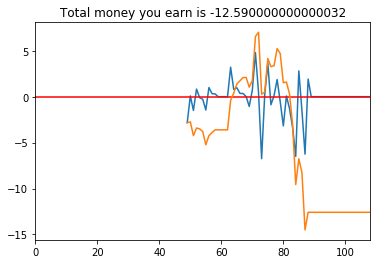

In [0]:
tradingStrategy(dfList[0])


#Data Analysis
###We have collected the data for different stocks from wiki for a period of 6 months and along with this stock data, we have collected twitter data and stocks data from different stock markets from different parts of the world for a same period of 6 months. At the same time we have collected the stock data of 10 years from different stock markets of the world to analyse the impact of different stock markets on US stocks.


#Data Visualize
###The stocks which we have collected from wiki will have open, close, high, low prices along with the volume that gets traded during that day. For the same period of time we collected twitter data as well to visualize the role of sentimental analysis in predicting the stock performance. To determine the correlation between different data, we calculated R-squared and probability F-statistics. 



#Data Prep: Curation

###Feature Selection and Extraction : Close and volume are the important features required to analyse the stock market. Similarly, positive and negative tweets are considered as important features to analyse the stock market.




#Data Verification: Do we have enough data?

###Initially, we have taken twitter for 7 days. Later we realised data was not sufficient. Hence we opted to collect 6 months of data for 10 different companies to come up with a model that can help us in analyzing the stock market. In regression models, we need multiple factors to determine the stock indices, so we have taken stock price movement for 10 years based on world stock indices to predict the price change of SPY.



#Data Cleansing

###While retrieving the twitter data, we usually get thousands of tweets per day for each company and using this raw data for data analysis is not possible, so we cleaned this data and came up with predictors such as positive, negative and neutral for better analysis.



#Data Normalization
###The data is normalized using standard scikit libraries before applying the datasets to the algorithms.

#Unsupervised Exploration : Finding relevant Clusters in our Dataset

#How many clusters? Explore different k’s…
###Stock market data for a year has been pulled and utilized to cluster the data. To smartly invest in stocks, it is best to diversify it. This helps the potential investors to choose from the variety of sectors. It helps to mitigate the risk of investment in stock without any idea or investing in a specific sector. To solve the issue, need to group the companies under various clusters. To achieve this, we worked to cluster the data based on the returns and volatility. The result of clustering helps to infer to diversify the data and invest in different sectors.



#Select Clustering algorithms, run several and compare in a table
###We selected such as KMeans, Gaussian, Hiereachical, DBSCAN, Mean Shift, Affinity propagation algorithms
A table has been created to compare accuracy and error against each other
below


#What does each cluster mean? How do they contribute to your Data Narrative (Story)
###Clustering is very much important as it determines intrinsic grouping the unlabeled data present. It is a common technique to determine the statistical data analysis. Based on volatility and returns, clustering has been done to help investors to segregate companies to know the investment profits or not.

##Affinity Propagation Algorithm
This algorithm creates clusters by sending message between pair of data samples.

The dataset used for experimennting this algorithm creates around 18 small clusters as given in the below graph.

In [0]:
def affinityPropagation(cleanData, priceDf):
  from matplotlib import gridspec 
  from sklearn.cluster import AffinityPropagation 
  from sklearn import metrics
  from math import sqrt
  from sklearn.datasets.samples_generator import make_blobs 
  from scipy.spatial.distance import pdist
 
  
  init = np.min(pdist(cleanData))
  X = cleanData
  af = AffinityPropagation(preference =-0.09).fit(X) 
  cluster_centers_indices = af.cluster_centers_indices_ 
  labels = af.labels_ 
  
  result = {}
  result['name'] = "affinityPropagation"
  result['accuracy'] = silhouette_score(X, labels)*100
  result['error'] = 100-result['accuracy']
  algorithmResults.append(result)

  #print(" Score ", mean_squared_error(X, labels))

  n_clusters_ = len(cluster_centers_indices)
  
  plt.close('all') 
  plt.figure(1) 
  plt.clf() 
  colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk') 

  for k, col in zip(range(n_clusters_), colors): 
    class_members = labels == k 
    cluster_center = X[cluster_centers_indices[k]] 
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.') 
    plt.plot(cluster_center[0], cluster_center[1], 'o', 
             markerfacecolor = col, markeredgecolor ='k', 
             markersize = 14) 
  
    for x in X[class_members]: 
        plt.plot([cluster_center[0], x[0]],  
                 [cluster_center[1], x[1]], col) 
  plt.title('Estimated number of clusters: % d' % n_clusters_) 
  plt.show() 

  mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}  
  for key, value in mydict.items():
    names = []
    for val in value:
      names.append(priceDf.columns[val])
    print ("Cluster No : "+str(key)+"  Companies :"+str(names))
  

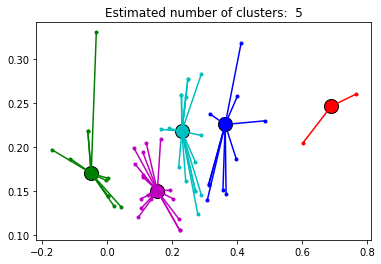

Cluster No : 0  Companies :['AMZN', 'JNJ', 'WMT', 'HPE', 'NFLX', 'LDOS', 'MXIM', 'MU', 'MSI', 'NTAP', 'AMAT.1', 'JKHY.1']
Cluster No : 1  Companies :['CSCO', 'TGT', 'PFE', 'INTC', 'T', 'DXC', 'JKHY', 'STX', 'XLNX', 'BA', 'CTXS', 'VRSN']
Cluster No : 2  Companies :['AAPL', 'HD', 'QRVO']
Cluster No : 3  Companies :['ORCL', 'MSFT', 'AVGO', 'ADP', 'ADSK', 'JNPR', 'MSFT', 'PAYX', 'PYPL', 'SNPS', 'XRX', 'GLW', 'DXC.1', 'EA', 'MA', 'TMUS', 'TEL']
Cluster No : 4  Companies :['date', 'IBM', 'JNPR', 'GOOG', 'VZ', 'CRM', 'AMAT', 'IT', 'IBM', 'KLAC', 'NVDA', 'SYMC', 'WDC', 'CTL', 'EBAY', 'FFIV', 'FIS', 'QRVO.1', 'TXN', 'VZ.1']


In [0]:
affinityPropagation(cleanData, priceDf)

##Mean Shift Cluster
Mean Shift is a Hierarchical clustering algorithm, In contrast to machine learning algorithms, clustering attempts to group data without having been first train on a labeled data. Mean shift don't need to know number of clusters beforehand. Referred to following link to implement this algoritm by using our own dataset.
total number of clusters : 5
https://towardsdatascience.com/machine-learning-algorithms-part-13-mean-shift-clustering-example-in-python-4d6452720b00

In [0]:
def meanShiftClustering(cleanData, priceDf):
  import pandas as pd
  import matplotlib.pyplot as plt
  import numpy as np
  from sklearn.cluster import MeanShift
  from math import sqrt
  from mpl_toolkits.mplot3d import Axes3D

  X = cleanData
  ms = MeanShift()
  ms.fit(X)
  cluster_centers = ms.cluster_centers_
  
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(X[:, 0], X[:, 1], marker ='o') 
  ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker ='x', color ='red', 
           s = 300, linewidth = 5, zorder = 10)
  plt.show() 

  from itertools import cycle
  labels = ms.labels_
  labels_unique = np.unique(labels)
  n_clusters_ = len(labels_unique)#print("number of estimated clusters : %d" % n_clusters_)
  
  plt.figure()
  colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10)
  
  plt.title('Estimated number of clusters: %d' % n_clusters_)
  plt.show()

  result = {}
  result['name'] = "Mean Shift"
  result['accuracy'] = silhouette_score(X, labels)*100
  result['error'] = 100-result['accuracy']
  algorithmResults.append(result)

  mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}  
  for key, value in mydict.items():
    names = []
    for val in value:
      names.append(priceDf.columns[val])
    print ("Cluster No : "+str(key)+"  Companies :"+str(names))

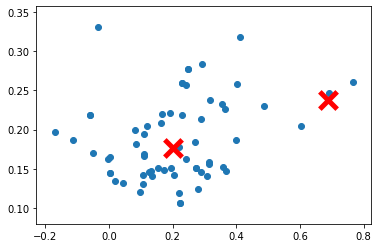

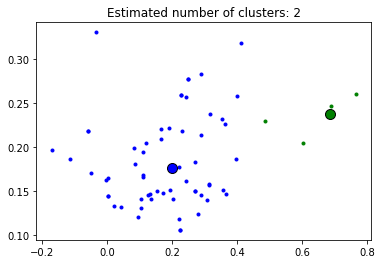

Cluster No : 0  Companies :['date', 'IBM', 'AMZN', 'CSCO', 'JNPR', 'ORCL', 'TGT', 'PFE', 'JNJ', 'MSFT', 'GOOG', 'WMT', 'HPE', 'INTC', 'T', 'VZ', 'NFLX', 'CRM', 'AVGO', 'AMAT', 'ADP', 'ADSK', 'DXC', 'IT', 'IBM', 'JKHY', 'JNPR', 'KLAC', 'LDOS', 'MXIM', 'MU', 'MSFT', 'NTAP', 'NVDA', 'PAYX', 'PYPL', 'STX', 'SYMC', 'SNPS', 'WDC', 'XLNX', 'XRX', 'AMAT.1', 'BA', 'CTL', 'CTXS', 'GLW', 'DXC.1', 'EBAY', 'EA', 'FFIV', 'FIS', 'JKHY.1', 'MA', 'QRVO.1', 'TMUS', 'TEL', 'TXN', 'VRSN', 'VZ.1']
Cluster No : 1  Companies :['AAPL', 'HD', 'MSI', 'QRVO']


In [0]:
meanShiftClustering(cleanData, priceDf)

##BIRCH Clustering Algorithm
Balanced Iterative Reducing and Clustering using Hierarchies(BIRCH) algorithm attempts to minimize the memory requirements of large datasets by summarizing the information contained in dense regions. These dense regions after clustering is called Clustering Feature (CF).

The following code runs on a dataset of 500 companies stocks and it created 3 clusters as given in the below graph.

In [0]:
def BirchClustering(cleanData, priceDf):
  from sklearn.datasets.samples_generator import make_blobs
  from sklearn.cluster import Birch
  from math import sqrt

  X = cleanData
 
  n_clusters = 3
  
  plt.scatter(X[:,0], X[:,1], alpha=0.9, edgecolors='b')
  
  brc = Birch(branching_factor=50, n_clusters=n_clusters, threshold=.05)
  brc.fit(X)
  
  Birch(branching_factor=50, compute_labels=True, copy=True, 
        n_clusters=n_clusters, threshold=0.1)
  labels = brc.predict(X)
  plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
  print(labels)

  result = {}
  result['name'] = "Birch Clustersing"
  result['accuracy'] = silhouette_score(X, labels)*100
  result['error'] = 100-result['accuracy']
  algorithmResults.append(result)
  
  mydict = {i: np.where(labels == i)[0] for i in range(n_clusters)}  
  for key, value in mydict.items():
    names = []
    for val in value:
      if (val == 0):
        continue
      names.append(priceDf.columns[val])
    print ("Cluster No : "+str(key)+"  Companies :"+str(names))

[1 0 2 0 1 1 0 1 1 0 0 1 0 0 1 1 1 2 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1
 0 0 2 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0]
Cluster No : 0  Companies :['IBM', 'AMZN', 'ORCL', 'JNJ', 'MSFT', 'WMT', 'HPE', 'NFLX', 'AVGO', 'ADP', 'ADSK', 'IBM', 'JNPR', 'LDOS', 'MXIM', 'MU', 'MSFT', 'MSI', 'NTAP', 'PAYX', 'PYPL', 'SNPS', 'XRX', 'AMAT.1', 'CTL', 'GLW', 'EA', 'FIS', 'JKHY.1', 'MA', 'TMUS', 'TEL', 'VZ.1']
Cluster No : 1  Companies :['CSCO', 'JNPR', 'TGT', 'PFE', 'GOOG', 'INTC', 'T', 'VZ', 'CRM', 'AMAT', 'DXC', 'IT', 'JKHY', 'KLAC', 'NVDA', 'STX', 'SYMC', 'WDC', 'XLNX', 'BA', 'CTXS', 'DXC.1', 'EBAY', 'FFIV', 'QRVO.1', 'TXN', 'VRSN']
Cluster No : 2  Companies :['AAPL', 'HD', 'QRVO']


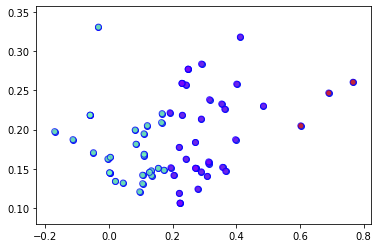

In [0]:
BirchClustering(cleanData, priceDf)

##K-Means Algorithm

K-Means clustering algorithm to divide the stocks into distinct groups based upon said returns and volatilities. Dividing stocks into groups with “similar characteristics” can help in portfolio construction to ensure we choose a universe of stocks with sufficient diversification between them.
  first decision is to choose how many clusters do we actually want to separate the data into. Rather than make some arbitrary decision we can use an “Elbow Curve” to highlight the relationship between how many clusters we choose, and the Sum of Squared Errors (SSE) resulting from using that number of clusters.

In [0]:
def kMeansAlgorithm(cleanData, priceDf):
 
  from sklearn.preprocessing import Normalizer
  import pandas as pd
  import numpy as np
  import seaborn as sns
  import  pylab as pl
  sns.set()
  from sklearn.datasets.samples_generator import make_blobs
  from sklearn.cluster import KMeans
  from math import sqrt
  from sklearn import preprocessing
  
  X = cleanData
  #print(X)
  sse = []
  for k in range(2,5):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters

  pl.plot(range(2,5), sse)
  pl.title("Elbow Curve")
  pl.show()
  
  cluster_map = pd.DataFrame()
  kmeans =KMeans(n_clusters = 3).fit(X)
  kmeans.cluster_centers_
  print(kmeans.labels_)
  #Labels of each point

  mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
  centroids = kmeans.cluster_centers_
  pl.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
  pl.show()

  result = {}
  result['name'] = "K-Means Clustering"
  result['accuracy'] = silhouette_score(X, kmeans.labels_)*100
  result['error'] = 100-result['accuracy']
  algorithmResults.append(result)
  
  for key, value in mydict.items():
    names = []
    for val in value:
      names.append(priceDf.columns[val])
    print ("Cluster No : "+str(key)+"  Companies :"+str(names))
    
  #print(dictlist)
  #cluster_map['data_index'] = X.index.values
  #cluster_map['cluster'] = kmeans.labels_
  
  #print(cluster_map[cluster_map.cluster == 4])
  

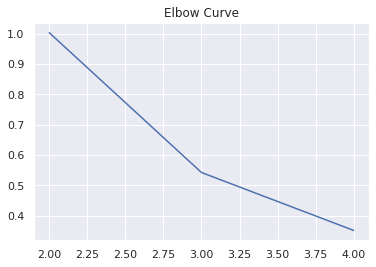

[2 1 0 1 2 2 1 2 2 1 1 1 1 1 2 2 2 0 1 2 1 2 1 1 2 2 1 2 1 1 1 1 1 1 0 1 2
 1 1 0 2 2 1 2 2 1 1 2 1 2 1 1 2 1 2 1 1 1 2 1 1 2 2 1]


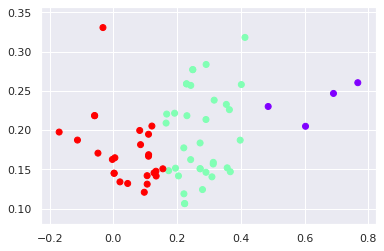

Cluster No : 0  Companies :['AAPL', 'HD', 'MSI', 'QRVO']
Cluster No : 1  Companies :['IBM', 'AMZN', 'ORCL', 'JNJ', 'MSFT', 'GOOG', 'WMT', 'HPE', 'NFLX', 'AVGO', 'ADP', 'ADSK', 'IBM', 'JNPR', 'KLAC', 'LDOS', 'MXIM', 'MU', 'MSFT', 'NTAP', 'PAYX', 'PYPL', 'SNPS', 'XRX', 'AMAT.1', 'CTL', 'GLW', 'DXC.1', 'EA', 'FIS', 'JKHY.1', 'MA', 'TMUS', 'TEL', 'VZ.1']
Cluster No : 2  Companies :['date', 'CSCO', 'JNPR', 'TGT', 'PFE', 'INTC', 'T', 'VZ', 'CRM', 'AMAT', 'DXC', 'IT', 'JKHY', 'NVDA', 'STX', 'SYMC', 'WDC', 'XLNX', 'BA', 'CTXS', 'EBAY', 'FFIV', 'QRVO.1', 'TXN', 'VRSN']


In [0]:
kMeansAlgorithm(cleanData, priceDf)

##Gaussian Clustering


In [0]:
def gaussianMixtureModel(cleanData, priceDf):
  from sklearn.mixture import GaussianMixture
  from sklearn.metrics import silhouette_samples, silhouette_score
  X = cleanData
  n_clusters = 3
  gmm = GaussianMixture(n_components=n_clusters,  covariance_type='spherical', random_state=0).fit(X)
  labels = gmm.predict(X)
  silhouette_avg = silhouette_score(X, labels)
  print(X[:,0])
  print(X[:,1])
  plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
  plt.title("GMM Clustering for Stock Data")

  print(labels)
  
  result = {}
  result['name'] = "Gaussian Mixture"
  result['accuracy'] = silhouette_score(X, labels)*100
  result['error'] = 100-result['accuracy']
  algorithmResults.append(result)

  mydict = {i: np.where(labels == i)[0] for i in range(n_clusters)}  
  for key, value in mydict.items():
    names = []
    for val in value:
      if (val == 0):
        continue
      names.append(priceDf.columns[val])
    print ("Cluster No : "+str(key)+"  Companies :"+str(names))

[ 0.11012611  0.1947849   0.60285322  0.35703245 -0.05905963  0.10573944
  0.24269395  0.04466     0.02048565  0.31312198  0.24236446  0.16524387
  0.31611988  0.36393588 -0.04858675  0.00218398  0.13333425  0.76691863
  0.36677864  0.0824754   0.22938888  0.10589617  0.29091211  0.27214106
 -0.00336228  0.11044546  0.22343836 -0.05901723  0.19197139  0.17322103
  0.3543058   0.41285721  0.31344936  0.29043787  0.48562928  0.40141712
  0.13403145  0.2904173   0.24893469  0.69057185 -0.17037187  0.12739488
  0.23063743  0.11012758 -0.11290307  0.22938888  0.39782466 -0.03289958
  0.22119748  0.00456615  0.27214106  0.16712528  0.12070661  0.22083603
  0.09679223  0.22343836  0.30914178  0.24893469  0.08510227  0.2795177
  0.27195562  0.15512507  0.00218398  0.20410754]
[0.16664447 0.15143327 0.20480404 0.15186844 0.21826515 0.14188457
 0.25691843 0.13193681 0.13395038 0.15673043 0.16232804 0.20890916
 0.23811846 0.22597096 0.17058503 0.14494151 0.1475346  0.26037287
 0.14689367 0.199485

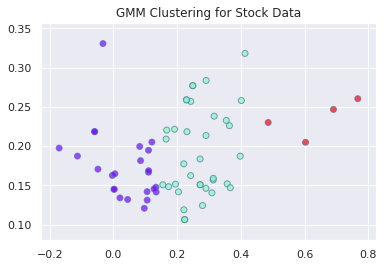

In [0]:
gaussianMixtureModel(cleanData, priceDf)

##Agglomerative Clustering




> Stock market data for a year has been pulled and utilized to cluster the data.  To smartly invest in stocks, it is best to diversify it. This helps the potential investors to choose from the variety of sectors. It helps to mitigate the risk of investment in stock without any idea or investing in a specific sector. To solve the issue, need to group the companies under various clusters. To achieve this, we worked to cluster the data based on the returns and volatility. The result of clustering helps to infer to diversify the data and invest in different sectors.

> Hierarchical Clustering is the process of combining two data points which are similar and having less distance. This process is repeated until single cluster is left. This forms a dendrogram or clustering tree.

> In order to determine the number of clusters, I have generated dendrogram. The number of clusters is detemined by cutting the dendrogram where there is a lot of space. When it is infered infer from the tree, the number of clusters is 2.









In [0]:
def agglomerativeClustering(cleanData, priceDf):
  from sklearn.cluster import AgglomerativeClustering
  import scipy.cluster.hierarchy as sch
  dendrogram = sch.dendrogram(sch.linkage(cleanData, method = 'complete'))
  plt.title('Dendrogram')
  plt.show()
 
  #Select the number of clusters from above Dendrogram
  n_clusters=3

  cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
  cluster.fit_predict(cleanData)
  print(cluster.labels_)
  print(cleanData[:,0])
  print(cleanData[:,1])
  plt.scatter(cleanData[:,0],cleanData[:,1], c=cluster.labels_, cmap='rainbow')
  
  result = {}
  result['name'] = "Agglomerative"
  result['accuracy'] = silhouette_score(cleanData, cluster.labels_)*100
  result['error'] = 100-result['accuracy']
  algorithmResults.append(result)

  mydict = {i: np.where(cluster.labels_ == i)[0] for i in range(n_clusters)}  
  for key, value in mydict.items():
    names = []
    for val in value:
      if (val == 0):
        continue
      names.append(priceDf.columns[val])
    print ("Cluster No : "+str(key)+"  Companies :"+str(names))

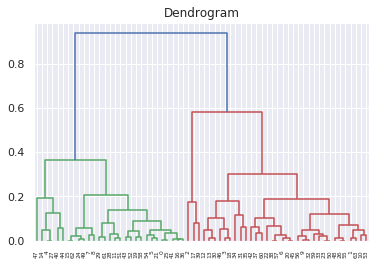

[1 0 2 0 1 1 0 1 1 0 0 0 0 0 1 1 1 2 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 2 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0]
[ 0.11012611  0.1947849   0.60285322  0.35703245 -0.05905963  0.10573944
  0.24269395  0.04466     0.02048565  0.31312198  0.24236446  0.16524387
  0.31611988  0.36393588 -0.04858675  0.00218398  0.13333425  0.76691863
  0.36677864  0.0824754   0.22938888  0.10589617  0.29091211  0.27214106
 -0.00336228  0.11044546  0.22343836 -0.05901723  0.19197139  0.17322103
  0.3543058   0.41285721  0.31344936  0.29043787  0.48562928  0.40141712
  0.13403145  0.2904173   0.24893469  0.69057185 -0.17037187  0.12739488
  0.23063743  0.11012758 -0.11290307  0.22938888  0.39782466 -0.03289958
  0.22119748  0.00456615  0.27214106  0.16712528  0.12070661  0.22083603
  0.09679223  0.22343836  0.30914178  0.24893469  0.08510227  0.2795177
  0.27195562  0.15512507  0.00218398  0.20410754]
[0.16664447 0.15143327 0.20480404 0.15186844 0.21826515 0.14188457
 0.25691843 0.13193681 

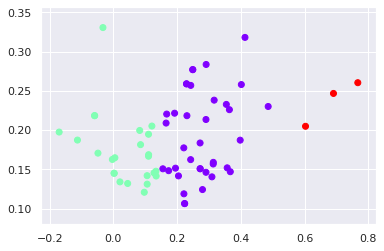

In [0]:
agglomerativeClustering(cleanData, priceDf)

#Supervised Training Preparation: Data Curation : label your data set

##DBSCAN Clustering 

In [0]:
def dbScanClustering(cleanData, priceDf):
  import  pylab as pl
  import numpy as np
  from sklearn.preprocessing import Normalizer
  import seaborn as sns
  sns.set()
  from sklearn.datasets.samples_generator import make_blobs
  from sklearn.cluster import DBSCAN
  from math import sqrt
  from sklearn import preprocessing
  
  X =  cleanData
  db = DBSCAN(eps=.05, min_samples=3).fit(X)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

  result = {}
  result['name'] = "DB Scan Clustering"
  result['accuracy'] = silhouette_score(X, labels)*100
  result['error'] = 100-result['accuracy']
  algorithmResults.append(result)

  print('Estimated number of clusters: %d' % n_clusters_)

  unique_labels = set(labels)
  plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
  for k in unique_labels:
    col=[0,0.5,1,1]
    if k == -1:
        col = [1, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col),markersize=5, alpha=0.5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col), markersize=5, alpha=0.5)

  plt.title('Estimated number of clusters: %d' % n_clusters_)
  plt.show()

  mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}  
  for key, value in mydict.items():
    names = []
    for val in value:
      names.append(priceDf.columns[val])
    print ("Cluster No : "+str(key)+"  Companies :"+str(names))

Estimated number of clusters: 2


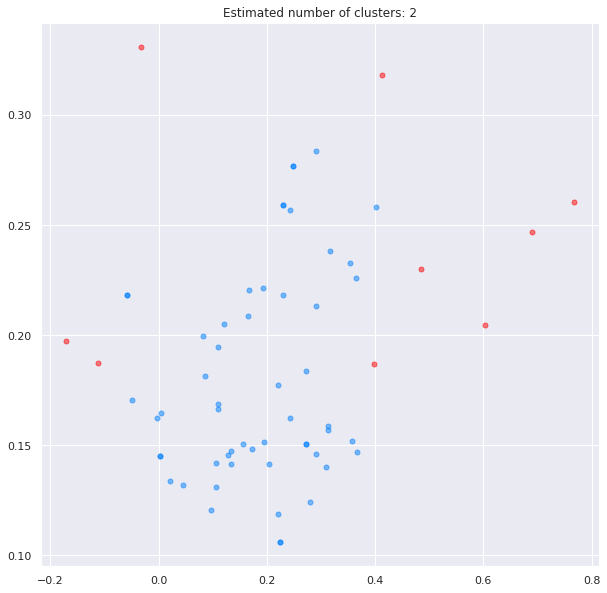

Cluster No : 0  Companies :['date', 'IBM', 'AMZN', 'JNPR', 'ORCL', 'JNJ', 'MSFT', 'GOOG', 'WMT', 'HPE', 'VZ', 'NFLX', 'CRM', 'AVGO', 'AMAT', 'ADP', 'ADSK', 'IT', 'IBM', 'JNPR', 'KLAC', 'LDOS', 'MU', 'MSFT', 'NTAP', 'NVDA', 'PAYX', 'PYPL', 'SYMC', 'SNPS', 'WDC', 'XRX', 'CTL', 'GLW', 'DXC.1', 'EBAY', 'EA', 'FFIV', 'FIS', 'JKHY.1', 'MA', 'QRVO.1', 'TMUS', 'TEL', 'TXN', 'VZ.1']
Cluster No : 1  Companies :['CSCO', 'TGT', 'PFE', 'INTC', 'T', 'DXC', 'JKHY', 'CTXS', 'VRSN']


In [0]:
dbScanClustering(cleanData, priceDf)

#Clustering Algorithms Comparision

In [0]:
def tabulateAlgorithmComparision():
  print(" ---------------------|---------- |------------------")
  print("    Algorithm Name    | Accuracy  |  MeanSquare Error")
  print(" ---------------------|---------- |------------------")
  for result in algorithmResults:
    print(" %19s  | %f | %f"%(result['name'], result['accuracy'], result['error']))
  print(" ---------------------|---------- |------------------")

In [0]:
tabulateAlgorithmComparision()

 ---------------------|---------- |------------------
    Algorithm Name    | Accuracy  |  MeanSquare Error
 ---------------------|---------- |------------------
 affinityPropagation  | 37.990235 | 62.009765
          Mean Shift  | 58.857840 | 41.142160
   Birch Clustersing  | 48.519074 | 51.480926
  K-Means Clustering  | 48.543235 | 51.456765
    Gaussian Mixture  | 48.331774 | 51.668226
       Agglomerative  | 48.751947 | 51.248053
  DB Scan Clustering  | 33.848492 | 66.151508
 ---------------------|---------- |------------------


##Latent Manifold and Regression

Data Story: To predict the stock price movement based on world stock indices and sentimental analysis using available data set and Twitter

It is a more natural to include more than one predictor in regression models. The growth of response is determined by multifactors. we will apply Multiple Linear Regression model to generate a signal for the growth of SPY. The exchange-traded fund, which tracks S&P 500. We will view the model using multiple indices from the global markets and predict the price change of SPY. The reason to choose SPY as a target to view the regression model is because it is very suitable for trading frequently.

> It is cheap. Each unit of SPY is always approximately one over 10 of S&P 500 index level. To earn SPY, it requires very low fee ratios. Volatility of SPY is very high. Two digits loss and gains race appears often.


Data set: Pulled data from quandl for different comapnies for a period of 6 months and 10 years for the current assignment we have analysed for world stock indices

We will predict data price change of SPY when US market opens in the morning. We know that different indices in different markets are highly correlated. Using indices for other markets is good for prediction model of SPY. Secondly, different markets are in different time zones. 


> For example, US market opens at 9:00 a.m and close at 4:00 p.m Eastern time today. Europe markets open at 3:00 a.m and close at 11:30 a.m Eastern time on the same day. That is, when US market opens, update data of Europe market is available. Asian markets including Australia open at around 8:00 p.m Eastern time yesterday and close at 3:00 a.m Eastern time today. That means the Asian market information is available for US market at its opening. we will use aud ordinaries from Australia, Nikkei from Japan, HSI from HK, DAX from Germany, CAC40 from France, S&P 500, Dji, and Nasdaq from US market, to predict the daily price change of SPY.


 

Linear regression on multiple features: Ran linear regression using multiple features such as low, high, volume and date to predict the close value

Data Preparation: Checked for null values and any outliers, but the data didn't contain any of them

Data enrichment: First linear regression was done for date vs close price, then multiple features such as low, high and volume were added as part of data enrichment.

Latent Manifold: Stock risk is a latent variable as it is can not be solved with the given variables. We need to use Twitter data, analyse it and determine the stock risk.

# Price Indices Calculation

Open is a price at the beginning. High, Low are the highest and lowest prices on that day. Adjust close price is adjusted closing price that has been amended to include any disputions and corporate actions that occurred at any time before the next day's open. Volume is the number of shares traded on that day. In our evaluation, we will only use open price to simplify our discussion.

we will mung the data to get all these predictors and the response. First, we generate an empty data frame and let the index to be the same as the index of SPY. Then, we add the contents of response and predictors we defined in last slide. If we print the head of this table, we find missing values. This is due to two reasons. When we calculate price change, we may generate NaN value in the first row, one-day lag, and the last row, one-day in the future. In different markets, they may have different holidays in which the markets are closed. It can be shown by computing numbers of NaN values in each column. We find Australia markets seems to have more holidays. We need to handle NaN values first before we view the model. First, we use fill-forward method to fill the holes of data frame by propagating last valid observation forward to next valid. Second, we drop the first row by using dropna. We can check if there is any NaN remaining by computing numbers NaN values. From the printout, it is clear that we fill all holes.

In [0]:
def worldStockDataMunging10():
  indicepane10['spy10']=spy10['Open'].shift(-1)-spy10['Open']
  indicepane10['spy10_lag1']=indicepane10['spy10'].shift(1)
  indicepane10['sp50010']=sp50010["Open"]-sp50010['Open'].shift(1)
  indicepane10['nasdaq10']=nasdaq10['Open']-nasdaq10['Open'].shift(1)
  indicepane10['dji10']=dji10['Open']-dji10['Open'].shift(1)

  indicepane10['cac4010']=cac4010['Open']-cac4010['Open'].shift(1)
  indicepane10['daxi10']=daxi10['Open']-daxi10['Open'].shift(1)

  indicepane10['aord10']=aord10['Close']-aord10['Open']
  indicepane10['hsi10']=hsi10['Close']-hsi10['Open']
  indicepane10['nikkei10']=nikkei10['Close']-nikkei10['Open']
  indicepane10['amzn10']=amzn10['Open']-amzn10['Open'].shift(1)
  indicepane10['Price10']=spy10['Open']
  # Lets check whether do we have NaN values in indicepane10
  return indicepane10

In [0]:
def worldStockDataMunging():
  indicepanel=pd.DataFrame(index=spy.index)
  
  indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
  indicepanel['spy_lag1']=indicepanel['spy'].shift(1)
  indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
  indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
  indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

  indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
  indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

  indicepanel['aord']=aord['Close']-aord['Open']
  indicepanel['hsi']=hsi['Close']-hsi['Open']
  indicepanel['nikkei']=nikkei['Close']-nikkei['Open']
  indicepanel['Price']=spy['Open']
  # Lets check whether do we have NaN values in indicepanel
  return indicepanel

In [0]:
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [0]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

# Model Evaluation for 10 years
Totally, we have 10 years of data, one response variable, nine predictors, and the last column keeps a record of open price of SPY. To make sure that our model is consistent in future data, we need to split data into two parts; one is for building the model, the other part is for testing the model to see if the model can still make reasonable prediction in this dataset.

Stock data is very noisy comparing to other static data like images. We will use the equal size of samples for both train and test. We assign the most recent, 1000 days at the test data and 1000 days before the test at the training data. Firstly, we use a scatter matrix to get a pairwise scatterplot. If you check the scatterplots, which will response SPY with other nine predictors. You may find that, there is no explicit pattern, which is evidence of high noisy properties of stock markets. We need to compute correlation in order to see the association clearly. From the output of correlation, we find that the predictors for Europe and Asian markets do have association with SPY, which have higher impacts than predictors of U.S. markets.

In [0]:
def evaluateWorldStockModel10(Train,Test):
  import warnings
  warnings.filterwarnings("ignore")
  from statsmodels.formula.api import ols
  #print (target)
  lm = ols(formula="spy10 ~ spy10_lag1+sp50010+nasdaq10+dji10+cac4010+aord10+daxi10+nikkei10+hsi10", data=Train).fit()
  print(lm.summary())
  # Make prediction
  Train['PredictedY'] = lm.predict(Train)
  Test['PredictedY'] = lm.predict(Test)
  plt.scatter(Train['spy10'], Train['PredictedY'])
  # We can measure the performance of our model using some statistical metrics - RMSE, Adjusted  R2R2 i.e. Model evaluation - Statistical standard
  # Get the assement table fo our model
  assesment=assessTable(Test, Train, lm, 9, 'spy10')
  print(assesment)

In [0]:
def LinearRegressionAlgo10(indicepanel10):
  import warnings
  warnings.filterwarnings("ignore")
  from pandas.plotting import scatter_matrix
  #split the data into (1)train set and (2)test set
  Train = indicepanel10.iloc[-2000:-1000, :]
  Test = indicepanel10.iloc[-1000:, :]
  print(Train.shape, Test.shape)
  # Generate scatter matrix among all stock markets (and the price of SPY) to observe the association
  sm = scatter_matrix(Train, figsize=(10, 10))
  # Find the indice with largest correlation i.e. Check the correlation of each index between spy
  corr_array = Train.iloc[:, :-1].corr()['spy10']
  print(corr_array)
  return Train, Test

(1000, 12) (1000, 12)
spy10         1.000000
spy10_lag1    0.000898
sp50010      -0.006047
nasdaq10      0.014008
dji10        -0.026437
cac4010       0.066689
daxi10       -0.029420
aord10        0.038096
hsi10        -0.052743
nikkei10      0.043779
amzn10       -0.029520
Name: spy10, dtype: float64


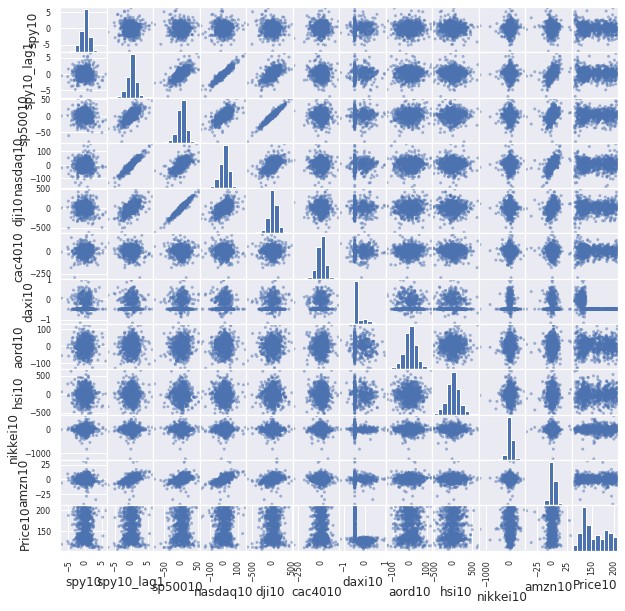

In [0]:
indicepane10=pd.DataFrame(index=spy10.index)
indicepanel10=worldStockDataMunging10()
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel10 = indicepanel10.fillna(method='ffill')
indicepanel10 = indicepanel10.dropna()  
lrTrain10, lrTest10 = LinearRegressionAlgo10(indicepanel10)

                            OLS Regression Results                            
Dep. Variable:                  spy10   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.980
Date:                Mon, 02 Dec 2019   Prob (F-statistic):             0.0385
Time:                        02:17:21   Log-Likelihood:                -1712.3
No. Observations:                1000   AIC:                             3445.
Df Residuals:                     990   BIC:                             3494.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0222      0.071      0.313      0.7

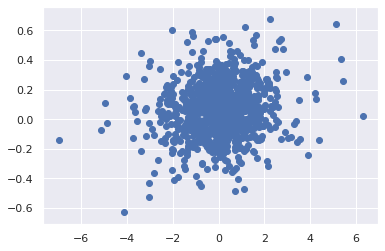

In [0]:
evaluateWorldStockModel10(lrTrain10,lrTest10)

# Model Evaluation for AMZN based on 10 Years Data and impact of World Stock Market

In [0]:
def evaluateAMZNStockModel10(Train,Test):
  import warnings
  warnings.filterwarnings("ignore")
  from statsmodels.formula.api import ols
  #print (target)
  lm = ols(formula="amzn10 ~ spy10+spy10_lag1+sp50010+nasdaq10+dji10+cac4010+aord10+daxi10+nikkei10+hsi10", data=Train).fit()
  print(lm.summary())
  # Make prediction
  Train['PredictedY'] = lm.predict(Train)
  Test['PredictedY'] = lm.predict(Test)
  plt.scatter(Train['amzn10'], Train['PredictedY'])
  # We can measure the performance of our model using some statistical metrics - RMSE, Adjusted  R2R2 i.e. Model evaluation - Statistical standard
  # Get the assement table fo our model
  assesment=assessTable(Test, Train, lm, 9, 'amzn10')
  print(assesment)

In [0]:
def LinearRegressionAMZN10(indicepanel10):
  import warnings
  warnings.filterwarnings("ignore")
  from pandas.plotting import scatter_matrix
  #split the data into (1)train set and (2)test set
  Train = indicepanel10.iloc[-2000:-1000, :]
  Test = indicepanel10.iloc[-1000:, :]
  print(Train.shape, Test.shape)
  # Generate scatter matrix among all stock markets (and the price of SPY) to observe the association
  sm = scatter_matrix(Train, figsize=(11, 11))
  # Find the indice with largest correlation i.e. Check the correlation of each index between amzn
  corr_array = Train.iloc[:, :-1].corr()['amzn10']
  print(corr_array)
  return Train, Test

(1000, 12) (1000, 12)
spy10        -0.029520
spy10_lag1    0.536813
sp50010       0.383370
nasdaq10      0.600620
dji10         0.309901
cac4010      -0.052505
daxi10       -0.032836
aord10        0.041135
hsi10         0.040282
nikkei10     -0.001293
amzn10        1.000000
Name: amzn10, dtype: float64


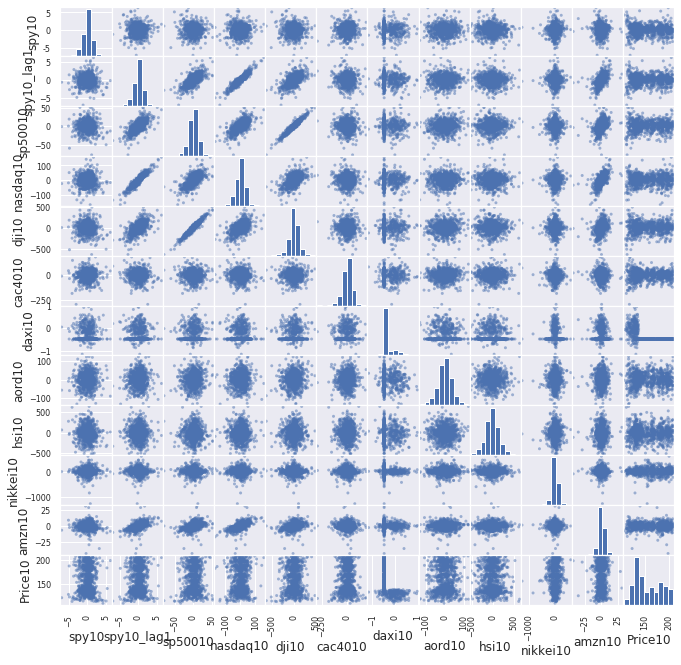

In [0]:
#indicepanel10=worldStockDataMunging10()
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
#indicepanel10 = indicepanel10.fillna(method='ffill')
#indicepanel10 = indicepanel10.dropna()  
lrTrain11, lrTest11 = LinearRegressionAMZN10(indicepanel10)

                            OLS Regression Results                            
Dep. Variable:                 amzn10   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     58.20
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.98e-92
Time:                        02:17:33   Log-Likelihood:                -2822.5
No. Observations:                1000   AIC:                             5667.
Df Residuals:                     989   BIC:                             5721.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1504      0.215     -0.699      0.4

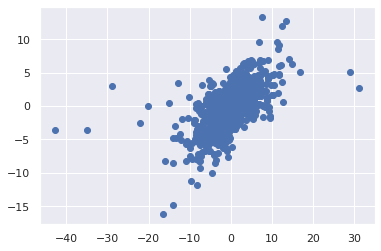

In [0]:
evaluateAMZNStockModel10(lrTrain11,lrTest11)

# Model Evaluation for 6 months

Totally, we have 108 days of data, one response variable, nine predictors, and the last column keeps a record of open price of SPY. To make sure that our model is consistent in future data, we need to split data into two parts; one is for building the model, the other part is for testing the model to see if the model can still make reasonable prediction in this dataset.

Stock data is very noisy comparing to other static data like images. We will use the equal size of samples for both train and test. We assign the most recent, 50 days at the test data and 50 days before the test at the training data. Firstly, we use a scatter matrix to get a pairwise scatterplot. If you check the scatterplots, which will response SPY with other nine predictors. You may find that, there is no explicit pattern, which is evidence of high noisy properties of stock markets. We need to compute correlation in order to see the association clearly. From the output of correlation, we find that the predictors for Europe and Asian markets do have association with SPY, which have higher impacts than predictors of U.S. markets.

In [0]:
def evaluateWorldStockModel(Train,Test):
  import warnings
  warnings.filterwarnings("ignore")
  from statsmodels.formula.api import ols
  #print (target)
  #print (predictor[[dji],[cac40]])
  formula = 'spy ~ sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
  lm = ols(formula="spy ~ spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi", data=Train).fit()
  #lm = ols(formula="spy ~ cac40+aord+daxi+nikkei+hsi", data=Train).fit()
  print(lm.summary())
  # Make prediction
  Train['PredictedY'] = lm.predict(Train)
  Test['PredictedY'] = lm.predict(Test)
  plt.scatter(Train['spy'], Train['PredictedY'])
  # We can measure the performance of our model using some statistical metrics - RMSE, Adjusted  R2R2 i.e. Model evaluation - Statistical standard
  # Get the assement table fo our model
  assesment=assessTable(Test, Train, lm, 9, 'spy')
  print(assesment)

In [0]:
def LinearRegressionAlgo(indicepanel):
  import warnings
  warnings.filterwarnings("ignore")
  from pandas.plotting import scatter_matrix
  #split the data into (1)train set and (2)test set
  Train = indicepanel.iloc[-100:-50, :]
  Test = indicepanel.iloc[-50:, :]
  print(Train.shape, Test.shape)
  # Generate scatter matrix among all stock markets (and the price of SPY) to observe the association
  sm = scatter_matrix(Train, figsize=(10, 10))
  # Find the indice with largest correlation i.e. Check the correlation of each index between spy
  corr_array = Train.iloc[:, :-1].corr()['spy']
  print(corr_array)
  return Train, Test

        spy  spy_lag1     sp500  ...         hsi      nikkei       Price
0  0.830002       NaN       NaN  ...  289.000000    0.269531  251.490005
1  0.369995  0.830002  9.140137  ...   67.910157  138.820313  252.320007
2  0.849991  0.369995  3.139892  ... -168.371093  -34.150391  252.690002
3  0.610001  0.849991  7.380127  ... -113.580078  -22.150391  253.539993
4  0.480011  0.610001  6.579834  ...  155.910156  -26.138671  254.149994

[5 rows x 11 columns]
spy         1
spy_lag1    1
sp500       1
nasdaq      1
dji         1
cac40       1
daxi        3
aord        0
hsi         2
nikkei      7
Price       0
dtype: int64
(50, 11) (50, 11)
spy         1.000000
spy_lag1   -0.088414
sp500      -0.053968
nasdaq     -0.107956
dji        -0.065364
cac40       0.100770
daxi        0.033694
aord       -0.136940
hsi        -0.090783
nikkei     -0.021987
Name: spy, dtype: float64


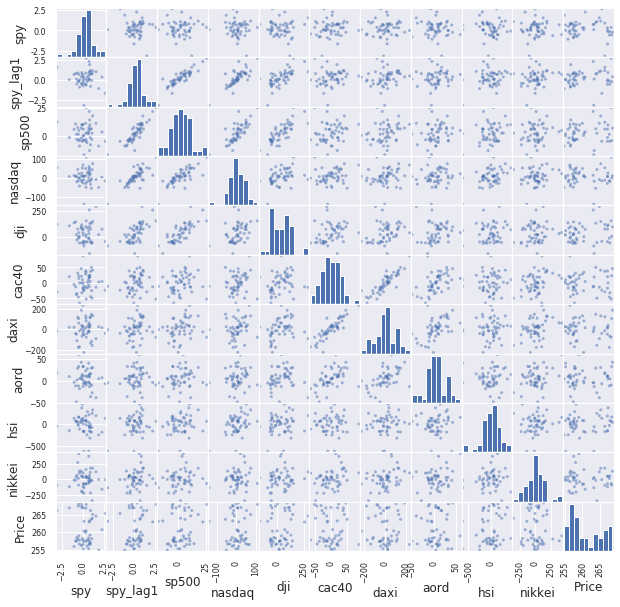

In [0]:
indicepanel=worldStockDataMunging()
print(indicepanel.head())
print(indicepanel.isnull().sum())
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()  
lrTrain, lrTest = LinearRegressionAlgo(indicepanel)

# Summary Table for Regression Results

 We can use OLS method of Statsmodels to build multiple linear equation model.

The summary is printed out. There are a couple things we need to pay attention; the first thing is a p value for F-statistics. F test is for overall significance of the multiple linear equation model. If we reject, we accept alternative and it means that at least one of the predictors is useful. P-value equal to .860 in our model, which is not less than .05 and it indicates that, our model includes useful predictors.

Summary table also lists the p value for the test of significance of the individual predictors. we know that p value of test statistic used for this test. For our results, we find that, most of the predictors are not significant, except the Aord. That means all other predictors are useless information of SPY. It may be because of multicollinearity.

                            OLS Regression Results                            
Dep. Variable:                    spy   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                 -0.099
Method:                 Least Squares   F-statistic:                    0.5079
Date:                Mon, 02 Dec 2019   Prob (F-statistic):              0.860
Time:                        02:17:41   Log-Likelihood:                -65.446
No. Observations:                  50   AIC:                             150.9
Df Residuals:                      40   BIC:                             170.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3474      0.162      2.147      0.0

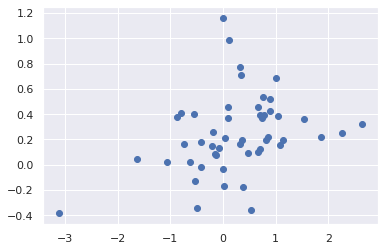

In [0]:
evaluateWorldStockModel(lrTrain,lrTest)

# Model Evaluation with Single Stock
Totally, we have 108 days of data, one response variable, nine predictors, and the last column keeps a record of open price of SPY. To make sure that our model is consistent in future data, we need to split data into two parts; one is for building the model, the other part is for testing the model to see if the model can still make reasonable prediction in this dataset.

Stock data is very noisy comparing to other static data like images. We will use the equal size of samples for both train and test. We assign the most recent, 50 days at the test data and 50 days before the test at the training data. Firstly, we use a scatter matrix to get a pairwise scatterplot. If you check the scatterplots, which will response SPY with other nine predictors. You may find that, there is no explicit pattern, which is evidence of high noisy properties of stock markets. We need to compute correlation in order to see the association clearly. From the output of correlation, we find that the predictors for Europe and Asian markets do have association with SPY, which have higher impacts than predictors of U.S. markets. 

In [0]:
def LinearRegressionAlgoIstock(indicepanel):
  import warnings
  warnings.filterwarnings("ignore")
  from pandas.plotting import scatter_matrix
  import matplotlib.pyplot as plt
  #split the data into (1)train set and (2)test set
  Train = indicepanel.iloc[-100:-50, :]
  Test = indicepanel.iloc[-50:, :]
  print(Train.shape, Test.shape)
  # Generate scatter matrix among all stock markets (and the price of SPY) to observe the association
  sm = scatter_matrix(Train, figsize=(11, 11))
  # Find the indice with largest correlation i.e. Check the correlation of each index between spy
  corr_array = Train.iloc[:, :-1].corr()['amzn']
  print(corr_array)
  return Train, Test

In [0]:
def evaluateWorldStockModel(Train,Test):
  import warnings
  warnings.filterwarnings("ignore")
  from statsmodels.formula.api import ols
  
  lm = ols(formula="amzn ~ spy+spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi", data=Train).fit()
  print(lm.summary())
  # Make prediction
  Train['PredictedY'] = lm.predict(Train)
  Test['PredictedY'] = lm.predict(Test)
  plt.scatter(Train['amzn'], Train['PredictedY'])
  # We can measure the performance of our model using some statistical metrics - RMSE, Adjusted  R2R2 i.e. Model evaluation - Statistical standard
  # Get the assement table fo our model
  assesment=assessTable(Test, Train, lm, 9, 'amzn')
  print(assesment)

['date', 'open', 'low', 'high', 'volume', 'close', 'Name', 'Date', 'Positve', 'Negative', 'Neutral', 'Total', 'NeutralPos', 'NeutralNeg', 'MA10', 'MA50']
(50, 12) (50, 12)
spy        -0.030814
spy_lag1    0.140603
sp500       0.179132
nasdaq     -0.019482
dji         0.343997
cac40       0.212004
daxi        0.204531
aord       -0.024920
hsi         0.070088
nikkei      0.066485
amzn        1.000000
Name: amzn, dtype: float64


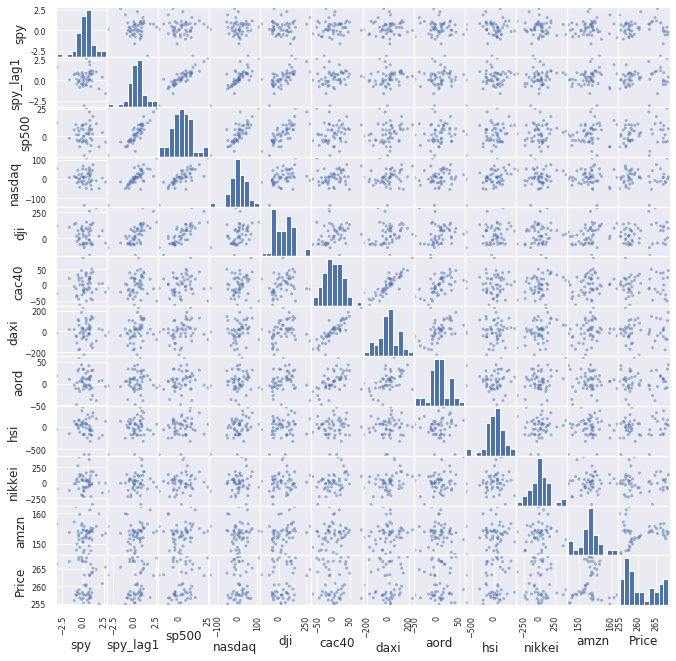

In [0]:
df3 = dfList[0].copy()
print(list(df3.columns))
indicepanel['amzn']=pd.DataFrame(df3.loc[:, ['open']]) 
columnsTitles=["spy","spy_lag1","sp500","nasdaq","dji","cac40","daxi","aord","hsi","nikkei","amzn","Price"]
indicepanel=indicepanel.reindex(columns=columnsTitles)
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()  
lr1Train, lr1Test = LinearRegressionAlgoIstock(indicepanel)

# Summary Table Interpretation

We can use OLS method of Statsmodels to build multiple linear equation model.

The summary is printed out. There are a couple things we need to pay attention; the first thing is a p value for F-statistics. F test is for overall significance of the multiple linear equation model. If we reject, we accept alternative and it means that at least one of the predictors is useful. P-value equal to .423 in our model, which is less than .05 and it indicates that, our model includes useful predictors.

Summary table also lists the p value for the test of significance of the individual predictors. we know that p value of test statistic used for this test. For our results, we find that, most of the predictors are not significant, except the Aord. That means all other predictors are useless information of SPY. It may be because of multicollinearity.

                            OLS Regression Results                            
Dep. Variable:                   amzn   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.049
Date:                Mon, 02 Dec 2019   Prob (F-statistic):              0.423
Time:                        02:17:49   Log-Likelihood:                -124.45
No. Observations:                  50   AIC:                             270.9
Df Residuals:                      39   BIC:                             291.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.2031      0.563    271.975      0.0

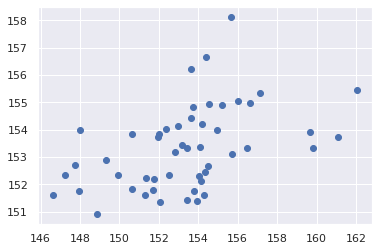

In [0]:
evaluateWorldStockModel(lr1Train,lr1Test)

# Model Evaluation with Single Stock and Sentiment Analysis with Twitter Data
Totally, we have 108 days of data, one response variable, nine predictors, and the last column keeps a record of open price of SPY. To make sure that our model is consistent in future data, we need to split data into two parts; one is for building the model, the other part is for testing the model to see if the model can still make reasonable prediction in this dataset.

Stock data is very noisy comparing to other static data like images. We will use the equal size of samples for both train and test. We assign the most recent, 50 days at the test data and 50 days before the test at the training data. Firstly, we use a scatter matrix to get a pairwise scatterplot. If you check the scatterplots, which will response SPY with other nine predictors. You may find that, there is no explicit pattern, which is evidence of high noisy properties of stock markets. We need to compute correlation in order to see the association clearly. From the output of correlation, we find that the predictors for Europe and Asian markets do have association with SPY, which have higher impacts than predictors of U.S. markets. We can use OLS method of Statsmodels to build multiple linear equation model.

The summary is printed out. There are a couple things we need to pay attention; the first thing is a p value for F-statistics. F test is for overall significance of the multiple linear equation model. If we reject, we accept alternative and it means that at least one of the predictors is useful. P-value equal to xxxx in our model, which is less than xxx and it indicates that, our model includes useful predictors.

Summary table also lists the p value for the test of significance of the individual predictors. we know that p value of test statistic used for this test. For our results, we find that, most of the predictors are not significant, except the Aord. That means all other predictors are useless information of SPY. It may be because of multicollinearity.

In [0]:
def LinearRegressionAlgoIstockandTwitter(indicepanel):
  import warnings
  warnings.filterwarnings("ignore")
  from pandas.plotting import scatter_matrix
  #split the data into (1)train set and (2)test set
  Train = indicepanel.iloc[-100:-50, :]
  Test = indicepanel.iloc[-50:, :]
  print(Train.shape, Test.shape)
  # Generate scatter matrix among all stock markets (and the price of SPY) to observe the association
  #sm = scatter_matrix(Train, figsize=(11, 11))
  # Find the indice with largest correlation i.e. Check the correlation of each index between spy
  corr_array = Train.iloc[:, :-1].corr()['amzn']
  print(corr_array)
  return Train, Test

In [0]:
def evaluateWorldStockModelwithTwitter(Train,Test):
  import warnings
  warnings.filterwarnings("ignore")
  from statsmodels.formula.api import ols
  
  lm = ols(formula="amzn ~ spy+spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi+tweets", data=Train).fit()
  print(lm.summary())
  # Make prediction
  Train['PredictedY'] = lm.predict(Train)
  Test['PredictedY'] = lm.predict(Test)
  plt.scatter(Train['amzn'], Train['PredictedY'])
  # We can measure the performance of our model using some statistical metrics - RMSE, Adjusted  R2R2 i.e. Model evaluation - Statistical standard
  # Get the assement table fo our model
  assesment=assessTable(Test, Train, lm, 9, 'amzn')
  print(assesment)

In [0]:
df2 = dfList[0].copy()

print(list(df2.columns))
indicepanel['tweets']=pd.DataFrame(df2.loc[:, ['Positve']]) 
columnsTitles=["spy","spy_lag1","sp500","nasdaq","dji","cac40","daxi","aord","hsi","nikkei","amzn","tweets","Price"]
indicepanel=indicepanel.reindex(columns=columnsTitles)
list(indicepanel.columns) 
print(indicepanel.head())
print(indicepanel.isnull().sum())
#We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()  
print(indicepanel.isnull().sum())
lr2Train, lr2Test = LinearRegressionAlgoIstockandTwitter(indicepanel)
#

['date', 'open', 'low', 'high', 'volume', 'close', 'Name', 'Date', 'Positve', 'Negative', 'Neutral', 'Total', 'NeutralPos', 'NeutralNeg', 'MA10', 'MA50']
        spy  spy_lag1     sp500  ...    amzn     tweets       Price
2  0.849991  0.369995  3.139892  ...  147.00  29.588993  252.690002
3  0.610001  0.849991  7.380127  ...  146.68  27.919128  253.539993
4  0.480011  0.610001  6.579834  ...  146.64  24.806202  254.149994
5 -0.029999  0.480011  3.949952  ...  146.50  23.724792  254.630005
6 -0.090011 -0.029999 -1.399903  ...  147.71  26.761364  254.600006

[5 rows x 13 columns]
spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
amzn        0
tweets      1
Price       0
dtype: int64
spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
amzn        0
tweets      0
Price       0
dtype: int64
(50, 13) (50, 13)
spy    

                            OLS Regression Results                            
Dep. Variable:                   amzn   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.242
Date:                Mon, 02 Dec 2019   Prob (F-statistic):              0.295
Time:                        02:17:50   Log-Likelihood:                -122.73
No. Observations:                  50   AIC:                             269.5
Df Residuals:                      38   BIC:                             292.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.8276      4.063     39.341      0.0

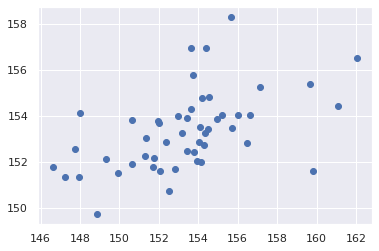

In [0]:
evaluateWorldStockModelwithTwitter(lr2Train,lr2Test)

# Relationship between Individual stock and Positive Tweets for 6 months data

In [0]:
def latentManifoldRegression(df):
  import pandas as pd
  import numpy as np
  from IPython.display import Markdown, display
  from sklearn.linear_model import LinearRegression
  from sklearn.model_selection import train_test_split
  from sklearn import metrics
  from sklearn.metrics import mean_squared_error, r2_score
  import datetime
  import matplotlib.pyplot as plt
  #style.use('ggplot')
  
  X= pd.DataFrame(df.loc[: , ['volume','close','high','low','NeutralPos']])
  Y= pd.DataFrame(df.loc[:, ['open']])

  corr = X.corr()
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
  fig.colorbar(cax)
  ticks = np.arange(0,len(X.columns),1)
  ax.set_xticks(ticks)
  plt.xticks(rotation=90)
  ax.set_yticks(ticks)
  ax.set_xticklabels(X.columns)
  ax.set_yticklabels(X.columns)
  plt.show()
  # Look at the X collected Data
 # print(X)
  # Look at the Y Collected Data
 # print(Y)
  
  from sklearn.model_selection import train_test_split
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.4, random_state = 0)
  # Fitting the Multiple Linear Regression in the Training set

  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_Train, Y_Train)

  # Predicting the Test set results

  Y_Pred = regressor.predict(X_Test)

  # Building the optimal model using Backward Elimination

  from statsmodels.formula.api import ols
  #import statsmodels.formula.api as sm
  #X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
 # X_Optimal = X[:, [0,1,2,3,4,5,6]]
  regressor_OLS = ols(formula='Y ~ close + volume + low + high + NeutralPos', data=X).fit()
  print(regressor_OLS.summary())



  # Fit the Regession Model on Original Data with Training
  regressor = LinearRegression()
  regressor.fit(X, Y)
  
  # Look at the real co-efficients
  v = pd.DataFrame(regressor.coef_,index=['Co-Efficient']).transpose()
  w = pd.DataFrame(X.columns, columns=['Attribute'])
  
  # Cotcatenate DataFrames
  coeff_df = pd.concat([w,v], axis=1, join='inner')
  print(" ## Actual Co-eeficient")
  
  print(coeff_df)
  
  # Check the original Predicted Value
  y_pred = regressor.predict(X)
  y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
  # print(y_pred)
  
  # Train the model
  xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=5)
  
  # Fit the trained mode
  regressor.fit(xtrain, ytrain)
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
  
  # Check the Co-efficient which model has choosen
  v = pd.DataFrame(regressor.coef_,index=['Co-Efficient']).transpose()
  w = pd.DataFrame(X.columns, columns=['Attribute'])
  
  # Cotcatenate DataFrames
  coeff_df = pd.concat([w,v], axis=1, join='inner')
  print("Predicted Co-eeficient")
  print
  print(coeff_df)
  
  
  # Compare the model
  y_pred = regressor.predict(xtest)
  y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
  #print(y_pred)
  #print(ytest)
  
  print 
  print("Evaluate the Algorithim")
  print("Mean Absolute Error:", metrics.mean_absolute_error(ytest, y_pred))
  print("Mean Squared Error:", metrics.mean_squared_error(ytest, y_pred))
  print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(ytest, y_pred))) 
  print("R Square Score:", metrics.r2_score(ytest,y_pred))
  
  

['date', 'open', 'low', 'high', 'volume', 'close', 'Name', 'Date', 'Positve', 'Negative', 'Neutral', 'Total', 'NeutralPos', 'NeutralNeg', 'MA10', 'MA50']


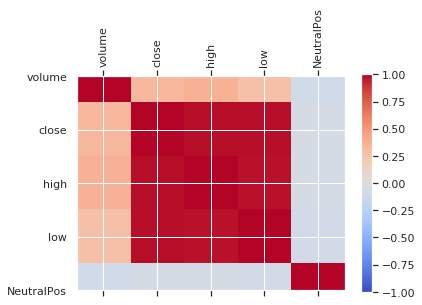

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1925.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          5.32e-100
Time:                        02:17:51   Log-Likelihood:                -96.012
No. Observations:                 109   AIC:                             204.0
Df Residuals:                     103   BIC:                             220.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0711      1.808      1.699      0.0

In [0]:
df4 = dfList[0].copy()
print (df4.columns.tolist())
latentManifoldRegression(df4)


#Supervised Training Preparation: 
###Classify Your Data Sets : Run different classification algorithms
Logistic regression, Decision tree, Random forest classification algorithms were applied on our dataset and Linear regression has also been applied on the dataset.Classification predictive modeling is the task of approximating a mapping function from input variables to discrete output variables.




#What regression objectives should we have? Complete your , add to your Data Story 
###Regression analysis is the form of predictive modelling technique which investigates the relationship between a dependent(target) and independent variable(predictor). It actually indicates the strength of impact of multiple independent variables on a dependent variable.


###Random Forest Classification Algorithm
Random forest is a supervised classification machine learning algorithm. In this assignment, we have worked on classifying the stock market data based on random forest. We split the dataset into 75% Training dataset and 25% for Testing dataset. we have calculated daily return histogram and strategy returns.

In [0]:
def randomForestAlgorithm(input):
  from sklearn.ensemble import RandomForestClassifier
  import warnings
  warnings.filterwarnings('ignore')
  
  data = input.copy()
  data['Open-Close'] = (data.open - data.close)/data.open
  data['High-Low'] = (data.high - data.low)/data.low
  data['percent_change'] = data['close'].pct_change()
  data['std_5'] = data['percent_change'].rolling(5).std()
  data['ret_5'] = data['percent_change'].rolling(5).mean()
  data.dropna(inplace=True)
  # X is the input variable
  X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

  # Y is the target or output variable
  y = np.where(data['close'].shift(-1) > data['close'], 1, -1)
  # Total dataset length
  dataset_length = data.shape[0]

  # Training dataset length
  split = int(dataset_length * 0.75)
  print(split)
  
  # Splitiing the X and y into train and test datasets
  X_train, X_test = X[:split], X[split:]
  y_train, y_test = y[:split], y[split:]

  # Print the size of the train and test dataset
  #print(X_train.shape, X_test.shape)
  #print(y_train.shape, y_test.shape)
  
  clf = RandomForestClassifier(random_state=5)
  model = clf.fit(X_train, y_train)
  from sklearn.metrics import accuracy_score
  print("Stock Name : "+data['Name'].iloc[0])
  print("===========================")
  print('  Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)
  
  # Run the code to view the classification report metrics
  from sklearn.metrics import classification_report
  report = classification_report(y_test, model.predict(X_test))
  #print(report)
  
  data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)
  
  %matplotlib inline
  import matplotlib.pyplot as plt
  data.strategy_returns[split:].hist()
  plt.xlabel('Strategy returns (%)')
  plt.show()
  
  (data.strategy_returns[split:]+1).cumprod().plot()
  plt.ylabel('Strategy returns (%)')
  plt.show()

   

45
Stock Name : IBM
  Correct Prediction (%):  66.66666666666666


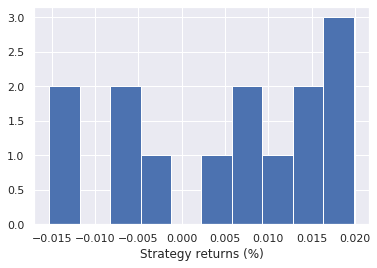

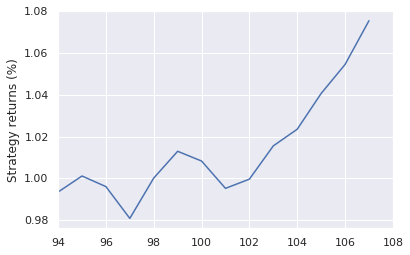

78
Stock Name : AAPL
  Correct Prediction (%):  65.38461538461539


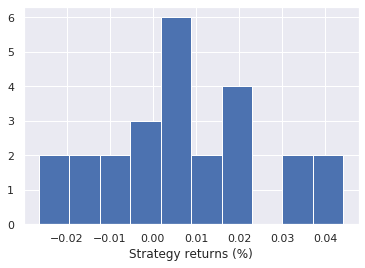

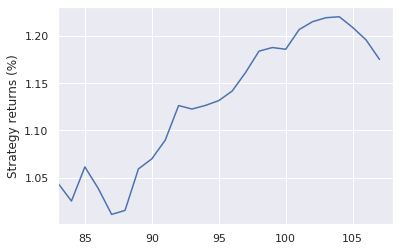

78
Stock Name : AMZN
  Correct Prediction (%):  65.38461538461539


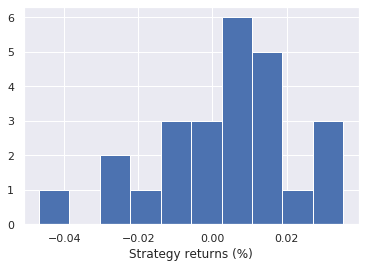

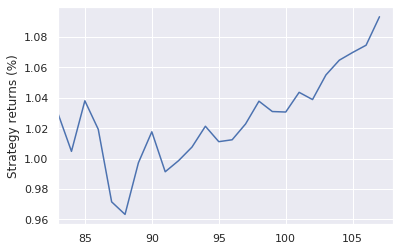

78
Stock Name : CSCO
  Correct Prediction (%):  46.15384615384615


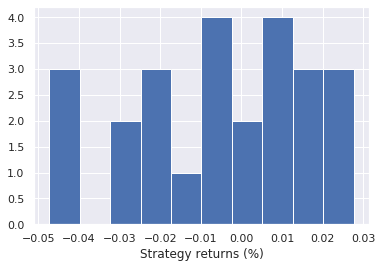

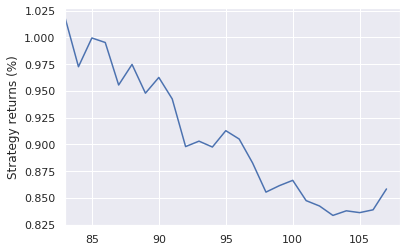

78
Stock Name : JNPR
  Correct Prediction (%):  50.0


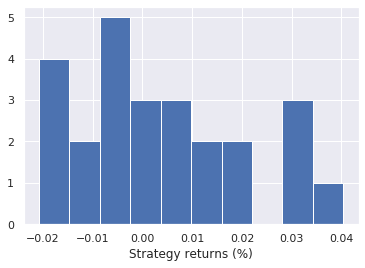

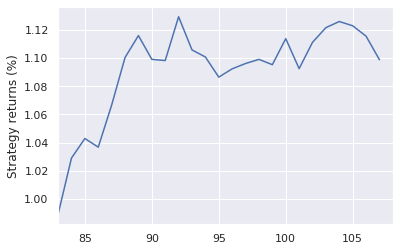

78
Stock Name : ORCL
  Correct Prediction (%):  46.15384615384615


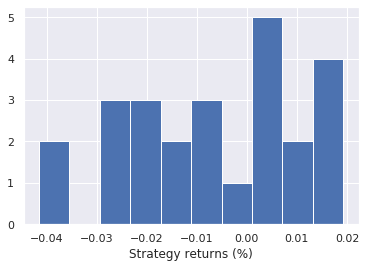

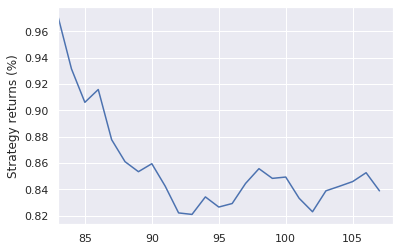

78
Stock Name : TGT
  Correct Prediction (%):  38.46153846153847


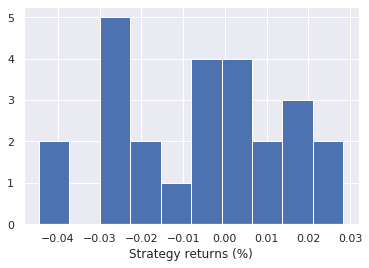

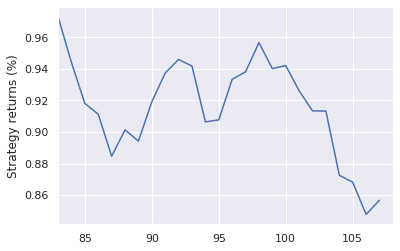

78
Stock Name : PFE
  Correct Prediction (%):  53.84615384615385


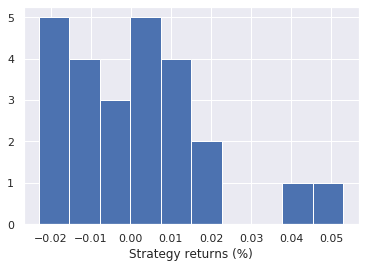

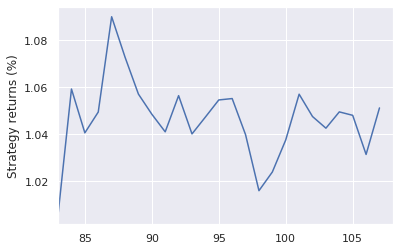

78
Stock Name : JNJ
  Correct Prediction (%):  57.692307692307686


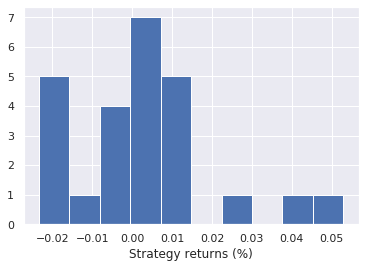

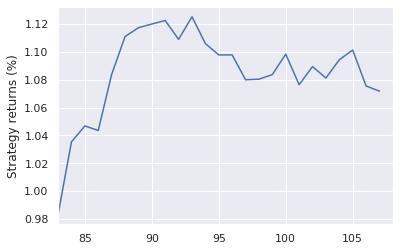

78
Stock Name : MSFT
  Correct Prediction (%):  50.0


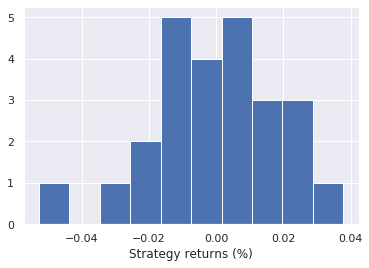

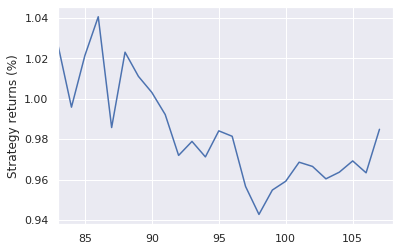

In [0]:
for df in dfList:
  randomForestAlgorithm(df)


##Decision Tree
classifying the stock market data based on decision tree. For that, we have used technical indicators. A technical indicator is a series of data points that are derived by applying a formula to the price data of a security. A technical indicator offers a different perspective from which to analyze the price action. A simple moving average is an indicator that calculates the average price of a security over a specified number of periods.

In [0]:
%%capture
def intallTa():  
  !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
  !tar -xzvf ta-lib-0.4.0-src.tar.gz
  %cd ta-lib
  !./configure --prefix=/usr
  !make
  !make install
  !pip install Ta-Lib
  import talib as ta

In [0]:
%%capture
intallTa()

In [0]:
def decisionTree(dfInput):
  import talib as ta 
  from sklearn.linear_model import LinearRegression
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import mean_squared_error, r2_score
  
  df = dfInput.copy()
  df['volume'] = df['volume'] / df['volume'].rolling(20).mean()
  df['range'] = (df['high'] - df['low']) / ta.ATR(df.high.values, df.low.values, df.close.values, 20)
  df['return'] = df.open.shift(-2) - df.open.shift(-1)
  df['EMA10'] = ta.EMA(df['close'].values, timeperiod = 10)
  df['EMA30'] = ta.EMA(df['close'].values, timeperiod = 30)
  df['ATR'] = ta.ATR(df['high'].values, df['low'].values, df['close'].values, timeperiod = 14)
  df['ADX'] = ta.ADX(df['high'].values, df['low'].values, df['close'].values, timeperiod = 14)
  df['RSI'] = ta.RSI(df['close'].values, timeperiod = 14)
  macd, macdsignal, macdhist = ta.MACD(df['close'].values, fastperiod = 12, slowperiod = 26, signalperiod = 9)
  df['MACD'] = macd
  df['MACDsignal'] = macdsignal
  df['ClgtEMA10'] = np.where(df['close'] > df['EMA10'], 1, -1)
  df['EMA10gtEMA30'] = np.where(df['EMA10'] > df['EMA30'], 1, -1)
  df['MACDSIGgtMACD'] = np.where(df['MACDsignal'] > df['MACD'], 1, -1)
  df['target_cls'] = np.where(df['return'] > 0, 1, 0)
  df['target_rgs'] = df['return']
  df.dropna(inplace = True)
  
  predictors = ['ATR', 'ADX','RSI', 'ClgtEMA10', 'EMA10gtEMA30', 'MACDSIGgtMACD']
  X = df[predictors]
  X.head()
  
  y_cls = df.target_cls
  y_rgs = df.target_rgs

  X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y_cls, test_size = 0.25, random_state = 42, stratify = y_cls)
  print (X_cls_train.shape, y_cls_train.shape)
  print (X_cls_test.shape, y_cls_test.shape)
  
  train_length = int(len(df)*0.75)
  X_rgs_train = X[:train_length]
  X_rgs_test = X[train_length:]
  y_rgs_train = y_rgs[:train_length]
  y_rgs_test = y_rgs[train_length:]

  print (X_rgs_train.shape, y_rgs_train.shape)
  print (X_rgs_test.shape, y_rgs_test.shape)
  
  clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 6)
 
  clf = clf.fit(X_cls_train, y_cls_train)
  
 

  return predictors, clf

(55, 6) (55,)
(19, 6) (19,)
(55, 6) (55,)
(19, 6) (19,)


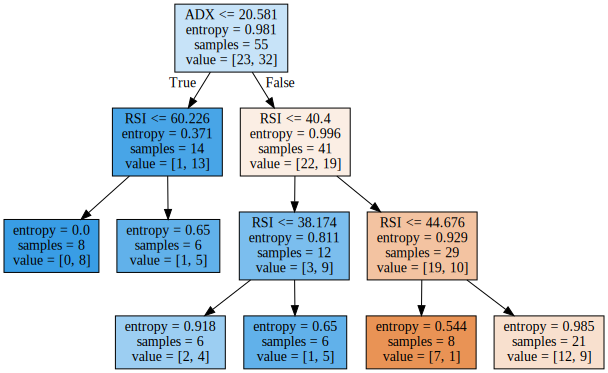

In [0]:
predictors, clf = decisionTree(dfList[5])
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,feature_names=predictors)
graphviz.Source(dot_data)

#Logistic Regression

Use 5-days moving average, correlation, relative strength index (RSI), the difference between the open price of yesterday and today, difference close price of yesterday and open price of today, open, high, low, and close price as indicators to make the prediction.

In [0]:
def logisticRegression(dfInput):
  # Machine learning
  import talib as ta 
  from sklearn.preprocessing import MinMaxScaler
  from pandas.plotting import register_matplotlib_converters
  scaler = MinMaxScaler(feature_range=(0, 1))
  from sklearn.linear_model import LogisticRegression

  df = dfInput.copy()
  #df = dfList[5].copy()
  df = df.dropna()
 
  register_matplotlib_converters()
 # df['Date'] = pd.to_datetime(df.date,format='%m/%d/%y')
  df.index = df['date']
  #plot
  plt.figure(figsize=(16,8))
  plt.plot(df['close'], label='Close Price history')

  df=df.drop(columns=['Name'])
  df=df.drop(columns=['volume'])
  df = df.iloc[:,:5]
  
  df['S_10'] = df['close'].rolling(window=5).mean()
  df['Corr'] = df['close'].rolling(window=5).corr(df['S_10'])
  df['RSI'] = ta.RSI(np.array(df['close']), timeperiod = 5)
  df['Open-Close'] = df['open'] - df['close'].shift(1)
  df['Open-Open'] = df['open'] - df['open'].shift(1)
  df = df.dropna()
  df=df.drop(columns=['date'])
  #print(df)
  X = df.iloc[:,:10]
  #print(X.head())
  
  #If the tomorrow's closing price is higher than today's closing price, buy the stock, else sell it.
  y = np.where (df['close'].shift(-1) > df['close'],1,-1)

  #Split the dataset into a training dataset and test dataset. Use 70% data to train and 30% to test. 
  #To do this, create a split variable which will divide the data frame in a 70-30 ratio.
  split = int(0.7*len(df))
  X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

  #start the logistic regression LogisticRegression function and fit the model on the training datasse
  model = LogisticRegression(solver='lbfgs',max_iter=500)
  model = model.fit (X_train,y_train)

  #Check the co-efficients
  print("The co-efficients :")
  print(pd.DataFrame(zip(X.columns, np.transpose(model.coef_))))

  probability = model.predict_proba(X_test)
  #print("Probability :")
  #print(probability)

  #Predict Class Labels. Now predict the class labels using predict function for the test dataset.
  predicted = model.predict(X_test)

  print("\nThe Confusion Matrix")
  print (metrics.confusion_matrix(y_test, predicted))

  print("\nThe Classification Report")
  print (metrics.classification_report(y_test, predicted))

  print("\nAccuracy")
  print (model.score(X_test,y_test))

  #Build Trading Strategy Using The Model. Predict the signal to buy (1) or sell (-1) and calculate.
  # Next, Calculate the cumulative strategy return based on the signal predicted by the model in the test dataset.
  # Plot the cumulative returns.
  df['Predicted_Signal'] = model.predict(X)
  df['AMAZON_returns'] = np.log(df['close']/df['close'].shift(1))
  Cumulative_Nifty_returns = np.cumsum(df[split:]['AMAZON_returns'])
  df['Startegy_returns'] = df['AMAZON_returns']* df['Predicted_Signal'].shift(1)
  Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
  plt.figure(figsize=(10,5))
  plt.plot(Cumulative_Nifty_returns, color='r',label = 'AMAZON Returns')
  plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
  plt.legend()
  plt.show()

The co-efficients :
            0                        1
0        open  [-0.025035036223218395]
1         low    [0.05081808982348366]
2        high      [0.057959093534725]
3       close    [-0.7366843799603718]
4        S_10    [0.15122634141677127]
5        Corr     [0.5117516794338557]
6         RSI    [0.02513454599187857]
7  Open-Close      [0.576784265758332]
8   Open-Open    [-0.8492380270031278]

The Confusion Matrix
[[ 9  3]
 [10  9]]

The Classification Report
              precision    recall  f1-score   support

          -1       0.47      0.75      0.58        12
           1       0.75      0.47      0.58        19

    accuracy                           0.58        31
   macro avg       0.61      0.61      0.58        31
weighted avg       0.64      0.58      0.58        31


Accuracy
0.5806451612903226


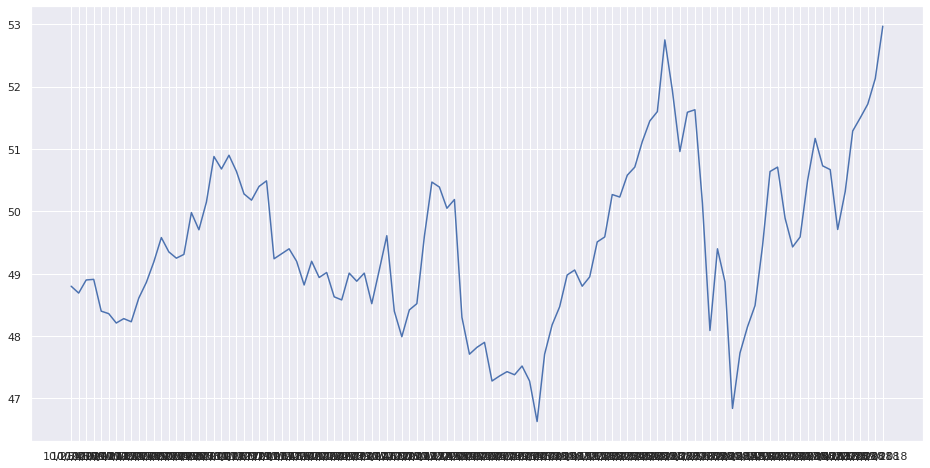

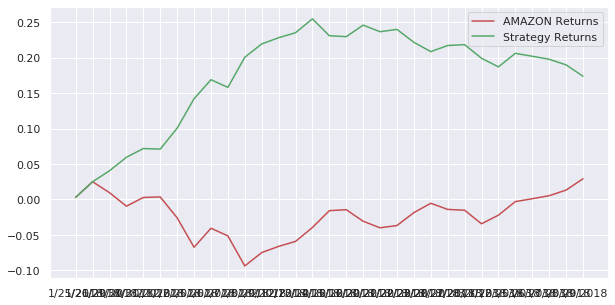

In [0]:
logisticRegression(dfList[5])


#Metrics and Evaluation
#F1, R2, RMSE, 
#Precision, Recall, Accuracy
#Confusion Matrix
###All the measures has been provided under respective algorithms

#Algorithm Comparison

Algorithm | Accuracy | Mean Square Error
--- | --- | --- 
Linear Regression | 64 | 36
Logistic Regression | 58 | 42
Decison Tree | 69 | 31
Random Forest | 66 | 34
Laten Manifold Regression | 68 | 32



#Clustering Algorithms Comparision

In [0]:
def tabulateAlgorithmComparision():
  print(" ---------------------|---------- |------------------")
  print("    Algorithm Name    | Accuracy  |  MeanSquare Error")
  print(" ---------------------|---------- |------------------")
  for result in algorithmResults:
    print(" %19s  | %f | %f"%(result['name'], result['accuracy'], result['error']))
  print(" ---------------------|---------- |------------------")

In [0]:
tabulateAlgorithmComparision()

 ---------------------|---------- |------------------
    Algorithm Name    | Accuracy  |  MeanSquare Error
 ---------------------|---------- |------------------
 affinityPropagation  | 37.990235 | 62.009765
          Mean Shift  | 58.857840 | 41.142160
   Birch Clustersing  | 48.519074 | 51.480926
  K-Means Clustering  | 48.543235 | 51.456765
    Gaussian Mixture  | 48.331774 | 51.668226
       Agglomerative  | 48.751947 | 51.248053
  DB Scan Clustering  | 33.848492 | 66.151508
 ---------------------|---------- |------------------
